In [1]:
#2024美赛-解决网球势头问题
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings 
warnings.filterwarnings('ignore')

In [2]:
df1 = pd.read_csv('Wimbledon_featured_matches.csv')
df2 = pd.read_csv('Overwhelming.csv')

In [3]:
df1

,match_id,player1,player2,elapsed_time,set_no,game_no,point_no,p1_sets,p2_sets,p1_games,...,p2_break_pt_won,p1_break_pt_missed,p2_break_pt_missed,p1_distance_run,p2_distance_run,rally_count,speed_mph,serve_width,serve_depth,return_depth
0,2023-wimbledon-1301,Carlos Alcaraz,Nicolas Jarry,0:00:00,1,1,1,0,0,0,...,0,0,0,6.000,7.840,2,95.0,BC,NCTL,ND
1,2023-wimbledon-1301,Carlos Alcaraz,Nicolas Jarry,0:00:38,1,1,2,0,0,0,...,0,0,0,5.253,7.094,1,118.0,B,CTL,ND
2,2023-wimbledon-1301,Carlos Alcaraz,Nicolas Jarry,0:01:01,1,1,3,0,0,0,...,0,0,0,13.800,19.808,4,120.0,B,NCTL,D
3,2023-wimbledon-1301,Carlos Alcaraz,Nicolas Jarry,0:01:31,1,1,4,0,0,0,...,0,0,0,51.108,75.631,13,130.0,BW,CTL,D
4,2023-wimbledon-1301,Carlos Alcaraz,Nicolas Jarry,0:02:21,1,1,5,0,0,0,...,0,0,0,0.649,0.813,1,112.0,W,NCTL,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7279,2023-wimbledon-1701,Carlos Alcaraz,Novak Djokovic,4:39:58,5,10,330,2,2,5,...,0,0,0,38.620,50.971,11,123.0,C,NCTL,D
7280,2023-wimbledon-1701,Carlos Alcaraz,Novak Djokovic,4:40:43,5,10,331,2,2,5,...,0,0,0,17.533,27.766,5,114.0,W,NCTL,ND
7281,2023-wimbledon-1701,Carlos Alcaraz,Novak Djokovic,4:41:20,5,10,332,2,2,5,...,0,0,0,10.882,18.328,4,124.0,W,NCTL,D
7282,2023-wimbledon-1701,Carlos Alcaraz,Novak Djokovic,4:41:52,5,10,333,2,2,5,...,0,0,0,7.893,10.537,1,130.0,C,NCTL,D


In [4]:
df2

,match_id,set_no,p1_ovw_s,p2_ovw_s
0,2023-wimbledon-1301,1,0.0000,0.0000
1,2023-wimbledon-1301,2,0.0000,0.0000
2,2023-wimbledon-1301,3,0.0000,0.0000
3,2023-wimbledon-1301,4,0.0000,0.0000
4,2023-wimbledon-1302,1,0.0000,0.0000
...,...,...,...,...
112,2023-wimbledon-1701,1,0.0000,0.0000
113,2023-wimbledon-1701,2,0.0000,0.6931
114,2023-wimbledon-1701,3,0.0000,0.0000
115,2023-wimbledon-1701,4,1.3863,0.0000


In [5]:
df = pd.merge(df1, df2, on=['match_id','set_no'], how='left',suffixes=('','')) 

In [6]:
selected_rows = df.iloc[552:560]

In [7]:
selected_rows

,match_id,player1,player2,elapsed_time,set_no,game_no,point_no,p1_sets,p2_sets,p1_games,...,p2_break_pt_missed,p1_distance_run,p2_distance_run,rally_count,speed_mph,serve_width,serve_depth,return_depth,p1_ovw_s,p2_ovw_s
552,2023-wimbledon-1303,Frances Tiafoe,Grigor Dimitrov,0:34:40,2,1,52,0,1,0,...,0,5.267,4.759,1,118.0,BW,NCTL,ND,0.0,0.6931
553,2023-wimbledon-1303,Frances Tiafoe,Grigor Dimitrov,0:34:59,2,1,53,0,1,0,...,0,10.285,8.659,1,126.0,C,NCTL,ND,0.0,0.6931
554,2023-wimbledon-1303,Frances Tiafoe,Grigor Dimitrov,0:35:44,2,2,54,0,1,0,...,0,5.019,6.263,1,123.0,BC,NCTL,D,0.0,0.6931
555,2023-wimbledon-1303,Frances Tiafoe,Grigor Dimitrov,0:36:02,2,2,55,0,1,0,...,0,5.940,5.187,1,85.0,W,CTL,D,0.0,0.6931
556,2023-wimbledon-1303,Frances Tiafoe,Grigor Dimitrov,0:36:29,2,2,56,0,1,0,...,0,13.291,15.717,3,92.0,C,NCTL,D,0.0,0.6931
557,2023-wimbledon-1303,Frances Tiafoe,Grigor Dimitrov,0:37:00,2,2,57,0,1,0,...,0,9.283,9.139,2,126.0,W,CTL,ND,0.0,0.6931
558,2023-wimbledon-1303,Frances Tiafoe,Grigor Dimitrov,0:37:21,2,2,58,0,1,0,...,0,13.867,17.960,4,111.0,W,CTL,ND,0.0,0.6931
559,2023-wimbledon-1303,Frances Tiafoe,Grigor Dimitrov,0:38:01,2,2,59,0,1,0,...,0,21.715,21.633,5,87.0,BW,NCTL,D,0.0,0.6931


In [8]:
df

,match_id,player1,player2,elapsed_time,set_no,game_no,point_no,p1_sets,p2_sets,p1_games,...,p2_break_pt_missed,p1_distance_run,p2_distance_run,rally_count,speed_mph,serve_width,serve_depth,return_depth,p1_ovw_s,p2_ovw_s
0,2023-wimbledon-1301,Carlos Alcaraz,Nicolas Jarry,0:00:00,1,1,1,0,0,0,...,0,6.000,7.840,2,95.0,BC,NCTL,ND,0.0,0.0
1,2023-wimbledon-1301,Carlos Alcaraz,Nicolas Jarry,0:00:38,1,1,2,0,0,0,...,0,5.253,7.094,1,118.0,B,CTL,ND,0.0,0.0
2,2023-wimbledon-1301,Carlos Alcaraz,Nicolas Jarry,0:01:01,1,1,3,0,0,0,...,0,13.800,19.808,4,120.0,B,NCTL,D,0.0,0.0
3,2023-wimbledon-1301,Carlos Alcaraz,Nicolas Jarry,0:01:31,1,1,4,0,0,0,...,0,51.108,75.631,13,130.0,BW,CTL,D,0.0,0.0
4,2023-wimbledon-1301,Carlos Alcaraz,Nicolas Jarry,0:02:21,1,1,5,0,0,0,...,0,0.649,0.813,1,112.0,W,NCTL,NaN,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7279,2023-wimbledon-1701,Carlos Alcaraz,Novak Djokovic,4:39:58,5,10,330,2,2,5,...,0,38.620,50.971,11,123.0,C,NCTL,D,0.0,0.0
7280,2023-wimbledon-1701,Carlos Alcaraz,Novak Djokovic,4:40:43,5,10,331,2,2,5,...,0,17.533,27.766,5,114.0,W,NCTL,ND,0.0,0.0
7281,2023-wimbledon-1701,Carlos Alcaraz,Novak Djokovic,4:41:20,5,10,332,2,2,5,...,0,10.882,18.328,4,124.0,W,NCTL,D,0.0,0.0
7282,2023-wimbledon-1701,Carlos Alcaraz,Novak Djokovic,4:41:52,5,10,333,2,2,5,...,0,7.893,10.537,1,130.0,C,NCTL,D,0.0,0.0


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7284 entries, 0 to 7283
Data columns (total 48 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   match_id            7284 non-null   object 
 1   player1             7284 non-null   object 
 2   player2             7284 non-null   object 
 3   elapsed_time        7284 non-null   object 
 4   set_no              7284 non-null   int64  
 5   game_no             7284 non-null   int64  
 6   point_no            7284 non-null   int64  
 7   p1_sets             7284 non-null   int64  
 8   p2_sets             7284 non-null   int64  
 9   p1_games            7284 non-null   int64  
 10  p2_games            7284 non-null   int64  
 11  p1_score            7284 non-null   object 
 12  p2_score            7284 non-null   object 
 13  server              7284 non-null   int64  
 14  serve_no            7284 non-null   int64  
 15  point_victor        7284 non-null   int64  
 16  p1_poi

In [10]:
#设置时间窗口，将一定时间段内的情况作为研究对象
def calculate_momentum_improved(df, index, window=3):
    start_index = max(index - window, 0)
    end_index = min(index + window + 1, len(df))
    window_df = df.iloc[start_index:end_index]
    
    # 初始化势头值
    p1_momentum = 0
    p2_momentum = 0
    
    # 赢得的局数和盘数
    p1_sets_won = window_df['p1_sets'].iloc[-1] - window_df['p1_sets'].iloc[0]
    p2_sets_won = window_df['p2_sets'].iloc[-1] - window_df['p2_sets'].iloc[0]
    p1_games_won = window_df['p1_games'].iloc[-1] - window_df['p1_games'].iloc[0]
    p2_games_won = window_df['p2_games'].iloc[-1] - window_df['p2_games'].iloc[0]

    # 发球优势
    # 认为发球方能够更好得分，设定额外权重
    serve_advantage_weight = 0.1
    p1_serve_advantage = (window_df[window_df['server'] == 1]['point_victor'] == 1).sum() * serve_advantage_weight
    p2_serve_advantage = (window_df[window_df['server'] == 2]['point_victor'] == 2).sum() * serve_advantage_weight
    
    # 胜利优势
    # 每一个game，获胜后会增强信心
    game_win_weight = 0.2
    p1_game_win = (window_df['game_victor'] == 1).sum() * game_win_weight
    p2_game_win = (window_df['game_victor'] == 2).sum() * game_win_weight
    
    # 胜利优势
    # 每一个set，获胜后会增强信心
    set_win_weight = 0.2
    p1_set_win = (window_df['set_victor'] == 1).sum() * set_win_weight
    p2_set_win = (window_df['set_victor'] == 2).sum() * set_win_weight
    
    # 上一轮胜利优势
    # 在得分上具有额外权重
    #ovws_advantage_weight = 0.5
    #p1_ovws = df['p1_ovw_s']#*ovws_advantage_weight
    #p2_ovws = df['p2_ovw_s']#*ovws_advantage_weight
    
    # 其他因素（得分优势、破发点、非受迫性失误、制胜分、直接发球得分、出现发球双误等）
    p1_points_advantage = window_df['point_victor'].apply(lambda x: x == 1).sum() - window_df['point_victor'].apply(lambda x: x == 2).sum()
    p2_points_advantage = -p1_points_advantage
    p1_break_points_won = window_df['p1_break_pt_won'].sum()
    p2_break_points_won = window_df['p2_break_pt_won'].sum()
    p1_unforced_errors = -window_df['p1_unf_err'].sum()
    p2_unforced_errors = -window_df['p2_unf_err'].sum()
    p1_winners = window_df['p1_winner'].sum()
    p2_winners = window_df['p2_winner'].sum()
    p1_ace_advantage = window_df['p1_ace'].sum()
    p2_ace_advantage = window_df['p2_ace'].sum()
    p1_double_fault = window_df['p1_double_fault'].sum()
    p2_double_fault = window_df['p2_double_fault'].sum() 
    p1_net_pt = window_df['p1_net_pt'].sum()
    p2_net_pt = window_df['p2_net_pt'].sum()   
    
    return p1_serve_advantage, p2_serve_advantage, p1_points_advantage, p2_points_advantage, p1_break_points_won,p2_break_points_won,p1_unforced_errors,p2_unforced_errors,p1_winners,p2_winners,p1_game_win,p2_game_win,p1_set_win,p2_set_win,p1_ace_advantage,p2_ace_advantage,p1_double_fault,p2_double_fault,p1_net_pt,p2_net_pt,p1_sets_won,p2_sets_won,p1_games_won,p2_games_won

In [11]:
cdf = [calculate_momentum_improved(df, index) for index in range(len(df))]

In [12]:
dfdd = pd.DataFrame(cdf)

In [13]:
dfdd

,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
0,0.2,0.0,0,0,0,0,-2,0,1,0,...,0,0,0,0,0,1,0,0,0,0
1,0.3,0.0,1,-1,0,0,-2,0,2,0,...,1,0,0,0,0,1,0,0,0,0
2,0.3,0.0,0,0,0,0,-2,0,2,0,...,1,0,0,0,0,1,0,0,0,0
3,0.4,0.0,1,-1,0,0,-2,0,3,0,...,2,0,0,0,0,1,0,0,0,0
4,0.4,0.0,1,-1,0,0,-1,0,3,1,...,2,0,0,0,0,2,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7279,0.3,0.1,1,-1,0,0,-1,0,2,1,...,0,0,0,0,1,1,0,0,0,1
7280,0.4,0.1,1,-1,0,0,-1,0,2,1,...,0,0,0,0,2,1,0,0,0,1
7281,0.4,0.0,2,-2,0,0,-1,0,2,1,...,0,0,0,0,2,1,0,0,0,0
7282,0.4,0.0,3,-3,0,0,0,0,2,1,...,0,0,0,0,2,1,0,0,0,0


In [14]:
dfd = df[['p1_ovw_s','p2_ovw_s']]

In [15]:
dfd

,p1_ovw_s,p2_ovw_s
0,0.0,0.0
1,0.0,0.0
2,0.0,0.0
3,0.0,0.0
4,0.0,0.0
...,...,...
7279,0.0,0.0
7280,0.0,0.0
7281,0.0,0.0
7282,0.0,0.0


In [16]:
dfdd = pd.concat([dfdd,dfd], axis=1, ignore_index=True)

In [17]:
dfdd

,0,1,2,3,4,5,6,7,8,9,...,16,17,18,19,20,21,22,23,24,25
0,0.2,0.0,0,0,0,0,-2,0,1,0,...,0,0,0,1,0,0,0,0,0.0,0.0
1,0.3,0.0,1,-1,0,0,-2,0,2,0,...,0,0,0,1,0,0,0,0,0.0,0.0
2,0.3,0.0,0,0,0,0,-2,0,2,0,...,0,0,0,1,0,0,0,0,0.0,0.0
3,0.4,0.0,1,-1,0,0,-2,0,3,0,...,0,0,0,1,0,0,0,0,0.0,0.0
4,0.4,0.0,1,-1,0,0,-1,0,3,1,...,0,0,0,2,0,0,0,0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7279,0.3,0.1,1,-1,0,0,-1,0,2,1,...,0,0,1,1,0,0,0,1,0.0,0.0
7280,0.4,0.1,1,-1,0,0,-1,0,2,1,...,0,0,2,1,0,0,0,1,0.0,0.0
7281,0.4,0.0,2,-2,0,0,-1,0,2,1,...,0,0,2,1,0,0,0,0,0.0,0.0
7282,0.4,0.0,3,-3,0,0,0,0,2,1,...,0,0,2,1,0,0,0,0,0.0,0.0


In [18]:
selected_rows = dfdd.iloc[552:560]

In [19]:
selected_rows

,0,1,2,3,4,5,6,7,8,9,...,16,17,18,19,20,21,22,23,24,25
552,0.2,0.4,-3,3,0,1,0,0,0,3,...,0,0,0,1,0,1,-2,-4,0.0,0.6931
553,0.3,0.4,-1,1,0,0,0,-1,0,2,...,0,0,0,0,0,0,0,1,0.0,0.6931
554,0.3,0.3,-1,1,0,0,-1,-1,0,1,...,0,0,0,0,0,0,0,1,0.0,0.6931
555,0.3,0.2,-1,1,0,0,-1,-1,0,1,...,0,0,1,0,0,0,0,1,0.0,0.6931
556,0.4,0.1,1,-1,0,0,-1,-1,0,1,...,0,0,1,0,0,0,0,1,0.0,0.6931
557,0.4,0.1,1,-1,0,0,-2,-1,0,1,...,0,0,1,0,0,0,1,0,0.0,0.6931
558,0.3,0.2,-1,1,0,0,-3,-1,0,1,...,0,0,1,0,0,0,1,0,0.0,0.6931
559,0.2,0.3,-3,3,0,0,-3,-1,0,2,...,0,0,1,0,0,0,1,0,0.0,0.6931


In [20]:
dfdd.columns=['p1_serve_advantage', 'p2_serve_advantage', 'p1_points_advantage', 'p2_points_advantage', 'p1_break_points_won','p2_break_points_won','p1_unforced_errors','p2_unforced_errors','p1_winners','p2_winners','p1_game_win','p2_game_win','p1_set_win','p2_set_win','p1_ace_advantage','p2_ace_advantage','p1_double_fault','p2_double_fault','p1_net_pt','p2_net_pt','p1_sets_won','p2_sets_won','p1_games_won','p2_games_won','p1_ovws','p2_ovws']

In [21]:
dfdd

,p1_serve_advantage,p2_serve_advantage,p1_points_advantage,p2_points_advantage,p1_break_points_won,p2_break_points_won,p1_unforced_errors,p2_unforced_errors,p1_winners,p2_winners,...,p1_double_fault,p2_double_fault,p1_net_pt,p2_net_pt,p1_sets_won,p2_sets_won,p1_games_won,p2_games_won,p1_ovws,p2_ovws
0,0.2,0.0,0,0,0,0,-2,0,1,0,...,0,0,0,1,0,0,0,0,0.0,0.0
1,0.3,0.0,1,-1,0,0,-2,0,2,0,...,0,0,0,1,0,0,0,0,0.0,0.0
2,0.3,0.0,0,0,0,0,-2,0,2,0,...,0,0,0,1,0,0,0,0,0.0,0.0
3,0.4,0.0,1,-1,0,0,-2,0,3,0,...,0,0,0,1,0,0,0,0,0.0,0.0
4,0.4,0.0,1,-1,0,0,-1,0,3,1,...,0,0,0,2,0,0,0,0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7279,0.3,0.1,1,-1,0,0,-1,0,2,1,...,0,0,1,1,0,0,0,1,0.0,0.0
7280,0.4,0.1,1,-1,0,0,-1,0,2,1,...,0,0,2,1,0,0,0,1,0.0,0.0
7281,0.4,0.0,2,-2,0,0,-1,0,2,1,...,0,0,2,1,0,0,0,0,0.0,0.0
7282,0.4,0.0,3,-3,0,0,0,0,2,1,...,0,0,2,1,0,0,0,0,0.0,0.0


In [22]:
dfdd1 = dfdd[['p1_serve_advantage', 'p2_serve_advantage', 'p1_points_advantage', 'p2_points_advantage', 'p1_break_points_won','p2_break_points_won','p1_winners','p2_winners','p1_game_win','p2_game_win','p1_set_win','p2_set_win','p1_ace_advantage','p2_ace_advantage','p1_net_pt','p2_net_pt','p1_sets_won','p2_sets_won','p1_games_won','p2_games_won','p1_ovws','p2_ovws']]
dfdd2 = dfdd[['p1_unforced_errors','p2_unforced_errors','p1_double_fault','p2_double_fault']]

In [23]:
dfdd2

,p1_unforced_errors,p2_unforced_errors,p1_double_fault,p2_double_fault
0,-2,0,0,0
1,-2,0,0,0
2,-2,0,0,0
3,-2,0,0,0
4,-1,0,0,0
...,...,...,...,...
7279,-1,0,0,0
7280,-1,0,0,0
7281,-1,0,0,0
7282,0,0,0,0


In [24]:
def data_Prepare2(data, flag, iMax, iMin):
    data_cols = data.columns.values
    maxval = np.max(data, axis=0)
    minval = np.min(data, axis=0)

    if flag == 0:
        Y = (data - minval)*(iMax-iMin) / (maxval - minval)  + iMin
        
    if flag == 1:
        Y = (maxval - data)*(iMax-iMin) / (maxval - minval) + iMin

    Y0 = np.array(Y * 1.0)
    Y0[np.where(Y0 == 0)] = 1.0
    Y0 = pd.DataFrame(Y0, columns = data_cols)
    return Y0

In [25]:
# 计算熵值与权重
def entropy(data):
    n, m = data.shape
    sumzb = np.sum(data, axis=0)
    
    #计算每个指标的概率
    probility = data / sumzb

    #计算每个指标的熵值
    entropy = (-1 / np.log(n) * np.sum(probility * np.log(probility), axis=0))

    #计算每个指标的权重
    weights = (1 - entropy) / np.sum(1 - entropy)
    weights = np.round(weights, 4)

    #计算加权得分
    score = np.round(np.sum(data * weights, axis = 1 ), 6)
    weights = pd.DataFrame(weights).T

    data['score'] = score
    return weights, data

In [26]:
#输入数据及参数设置
inputFile1 = dfdd1
inputFile2 = dfdd2
#设置归一化最小值值门限
MThreshold = 1.000
mThreshold = 0.001

In [27]:
inputFile2

,p1_unforced_errors,p2_unforced_errors,p1_double_fault,p2_double_fault
0,-2,0,0,0
1,-2,0,0,0
2,-2,0,0,0
3,-2,0,0,0
4,-1,0,0,0
...,...,...,...,...
7279,-1,0,0,0
7280,-1,0,0,0
7281,-1,0,0,0
7282,0,0,0,0


In [28]:
#数据集scores保存标识和评分
scores = pd.DataFrame([])

In [29]:
dfdd

,p1_serve_advantage,p2_serve_advantage,p1_points_advantage,p2_points_advantage,p1_break_points_won,p2_break_points_won,p1_unforced_errors,p2_unforced_errors,p1_winners,p2_winners,...,p1_double_fault,p2_double_fault,p1_net_pt,p2_net_pt,p1_sets_won,p2_sets_won,p1_games_won,p2_games_won,p1_ovws,p2_ovws
0,0.2,0.0,0,0,0,0,-2,0,1,0,...,0,0,0,1,0,0,0,0,0.0,0.0
1,0.3,0.0,1,-1,0,0,-2,0,2,0,...,0,0,0,1,0,0,0,0,0.0,0.0
2,0.3,0.0,0,0,0,0,-2,0,2,0,...,0,0,0,1,0,0,0,0,0.0,0.0
3,0.4,0.0,1,-1,0,0,-2,0,3,0,...,0,0,0,1,0,0,0,0,0.0,0.0
4,0.4,0.0,1,-1,0,0,-1,0,3,1,...,0,0,0,2,0,0,0,0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7279,0.3,0.1,1,-1,0,0,-1,0,2,1,...,0,0,1,1,0,0,0,1,0.0,0.0
7280,0.4,0.1,1,-1,0,0,-1,0,2,1,...,0,0,2,1,0,0,0,1,0.0,0.0
7281,0.4,0.0,2,-2,0,0,-1,0,2,1,...,0,0,2,1,0,0,0,0,0.0,0.0
7282,0.4,0.0,3,-3,0,0,0,0,2,1,...,0,0,2,1,0,0,0,0,0.0,0.0


In [30]:
#idvals保存标识列
idvals1 = dfdd1.copy().reset_index(drop=True)
idvals2 = dfdd2.copy().reset_index(drop=True)
idvals = pd.concat([idvals1, idvals2], axis=0, ignore_index=True)
#归一化处理并计算指标权重与评分
tmp_data1 = data_Prepare2(dfdd1, 0, MThreshold, mThreshold)
tmp_data2 = data_Prepare2(dfdd2, 1, MThreshold, mThreshold)
tmp_data = pd.concat([tmp_data1, tmp_data2], axis=0, ignore_index=True)

In [31]:
#计算熵权
weights, tmp_data = entropy(tmp_data)
idvals['score'] = tmp_data['score']

if (len(scores.index)==0):
    scores = pd.concat([scores, idvals], axis=0, ignore_index=True)
else:
    scores = pd.merge(scores, idvals, how="inner")

#对保存在scores中的指标评分结果进行熵权法打分

scores['weighted_score'] = tmp_data['score']

In [32]:
scores['weighted_score']

0        0.084275
1        0.107601
2        0.107615
3        0.130942
4        0.141671
           ...   
14563    0.039223
14564    0.039223
14565    0.039223
14566    0.033962
14567    0.033962
Name: weighted_score, Length: 14568, dtype: float64

In [33]:
weights.T

,0
p1_serve_advantage,0.0218
p2_serve_advantage,0.0217
p1_points_advantage,0.0181
p2_points_advantage,0.0183
p1_break_points_won,0.0705
p2_break_points_won,0.0767
p1_winners,0.0263
p2_winners,0.0277
p1_game_win,0.0307
p2_game_win,0.0321


In [34]:
def calculate_momentum_improved(df, index, window=3):
    start_index = max(index - window, 0)
    end_index = min(index + window + 1, len(df))
    window_df = df.iloc[start_index:end_index]

    p1_ovws = df.iloc[index]['p1_ovw_s']
    p2_ovws = df.iloc[index]['p2_ovw_s']
    
    # 初始化势头值
    p1_momentum = 0
    p2_momentum = 0
    
    # 赢得的局数和盘数
    p1_sets_won = window_df['p1_sets'].iloc[-1] - window_df['p1_sets'].iloc[0]
    p2_sets_won = window_df['p2_sets'].iloc[-1] - window_df['p2_sets'].iloc[0]
    p1_games_won = window_df['p1_games'].iloc[-1] - window_df['p1_games'].iloc[0]
    p2_games_won = window_df['p2_games'].iloc[-1] - window_df['p2_games'].iloc[0]

    # 发球优势
    # 假设发球方在每个得分上具有额外权重
    serve_advantage_weight = 0.1
    p1_serve_advantage = (window_df[window_df['server'] == 1]['point_victor'] == 1).sum() * serve_advantage_weight
    p2_serve_advantage = (window_df[window_df['server'] == 2]['point_victor'] == 2).sum() * serve_advantage_weight
    
    # 胜利优势
    # 每一个game
    game_win_weight = 0.2
    p1_game_win = (window_df['game_victor'] == 1).sum() * game_win_weight
    p2_game_win = (window_df['game_victor'] == 2).sum() * game_win_weight
    
    # 胜利优势
    # 每一个set
    set_win_weight = 0.2
    p1_set_win = (window_df['set_victor'] == 1).sum() * set_win_weight
    p2_set_win = (window_df['set_victor'] == 2).sum() * set_win_weight
    
    # 其他因素（得分优势、破发点、非受迫性失误、制胜分）
    p1_points_advantage = window_df['point_victor'].apply(lambda x: x == 1).sum() - window_df['point_victor'].apply(lambda x: x == 2).sum()
    p2_points_advantage = -p1_points_advantage
    p1_break_points_won = window_df['p1_break_pt_won'].sum()
    p2_break_points_won = window_df['p2_break_pt_won'].sum()
    p1_unforced_errors = -window_df['p1_unf_err'].sum()
    p2_unforced_errors = -window_df['p2_unf_err'].sum()
    p1_winners = window_df['p1_winner'].sum()
    p2_winners = window_df['p2_winner'].sum()
    p1_ace_advantage = window_df['p1_ace'].sum()
    p2_ace_advantage = window_df['p2_ace'].sum()
    p1_double_fault = window_df['p1_double_fault'].sum()
    p2_double_fault = window_df['p2_double_fault'].sum() 
    p1_net_pt = window_df['p1_net_pt'].sum()
    p2_net_pt = window_df['p2_net_pt'].sum()   

    #代入权重
    p1_momentum = 0.0218*p1_serve_advantage + 0.0181*p1_points_advantage + 0.0705*p1_break_points_won + 0.0263*p1_winners + 0.0307*p1_game_win + 0.0804*p1_set_win + 0.0476*p1_ace_advantage + 0.0345*p1_net_pt + 0.0170*p1_sets_won + 0.0179*p1_games_won + 0.0777*p1_ovws - 0.0316*p1_unforced_errors - 0.0171*p1_double_fault
    p2_momentum = 0.0217*p2_serve_advantage + 0.0183*p2_points_advantage + 0.0767*p2_break_points_won + 0.0277*p2_winners + 0.0321*p2_game_win + 0.0842*p2_set_win + 0.0489*p2_ace_advantage + 0.0312*p2_net_pt + 0.0170*p2_sets_won + 0.0178*p2_games_won + 0.0863*p2_ovws - 0.0301*p2_unforced_errors - 0.0168*p2_double_fault
    return p1_momentum, p2_momentum

In [35]:
momentum_values = [calculate_momentum_improved(df, index) for index in range(len(df))]

In [36]:
#如此，得到球员的势头

In [37]:
dddd=pd.DataFrame() #创建一个新数据集
for match_id in df['match_id'].unique():
    match_data = df[df['match_id'] == match_id].copy()
    match_data.reset_index(inplace=True,drop=True)
    momentum_values = [calculate_momentum_improved(match_data, index) for index in range(len(match_data))]
    p1_momentum=[]
    p2_momentum=[]
    for i in momentum_values:
        p1_momentum.append(i[0])
        p2_momentum.append(i[1])
        
#将计算得到的势头值分配回原始数据集
    match_data['p1_momentum']=pd.DataFrame(p1_momentum)
    match_data['p2_momentum']=pd.DataFrame(p2_momentum)
    dddd=pd.concat([dddd,match_data],axis=0)

In [38]:
dddd=pd.DataFrame(dddd)

In [39]:
dddd.head(5)

,match_id,player1,player2,elapsed_time,set_no,game_no,point_no,p1_sets,p2_sets,p1_games,...,p2_distance_run,rally_count,speed_mph,serve_width,serve_depth,return_depth,p1_ovw_s,p2_ovw_s,p1_momentum,p2_momentum
0,2023-wimbledon-1301,Carlos Alcaraz,Nicolas Jarry,0:00:00,1,1,1,0,0,0,...,7.840,2,95.0,BC,NCTL,ND,0.0,0.0,0.09386,0.0312
1,2023-wimbledon-1301,Carlos Alcaraz,Nicolas Jarry,0:00:38,1,1,2,0,0,0,...,7.094,1,118.0,B,CTL,ND,0.0,0.0,0.18804,0.0129
2,2023-wimbledon-1301,Carlos Alcaraz,Nicolas Jarry,0:01:01,1,1,3,0,0,0,...,19.808,4,120.0,B,NCTL,D,0.0,0.0,0.16994,0.0312
3,2023-wimbledon-1301,Carlos Alcaraz,Nicolas Jarry,0:01:31,1,1,4,0,0,0,...,75.631,13,130.0,BW,CTL,D,0.0,0.0,0.26412,0.0129
4,2023-wimbledon-1301,Carlos Alcaraz,Nicolas Jarry,0:02:21,1,1,5,0,0,0,...,0.813,1,112.0,W,NCTL,NaN,0.0,0.0,0.23252,0.0718


In [40]:
dddd.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7284 entries, 0 to 333
Data columns (total 50 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   match_id            7284 non-null   object 
 1   player1             7284 non-null   object 
 2   player2             7284 non-null   object 
 3   elapsed_time        7284 non-null   object 
 4   set_no              7284 non-null   int64  
 5   game_no             7284 non-null   int64  
 6   point_no            7284 non-null   int64  
 7   p1_sets             7284 non-null   int64  
 8   p2_sets             7284 non-null   int64  
 9   p1_games            7284 non-null   int64  
 10  p2_games            7284 non-null   int64  
 11  p1_score            7284 non-null   object 
 12  p2_score            7284 non-null   object 
 13  server              7284 non-null   int64  
 14  serve_no            7284 non-null   int64  
 15  point_victor        7284 non-null   int64  
 16  p1_points_wo

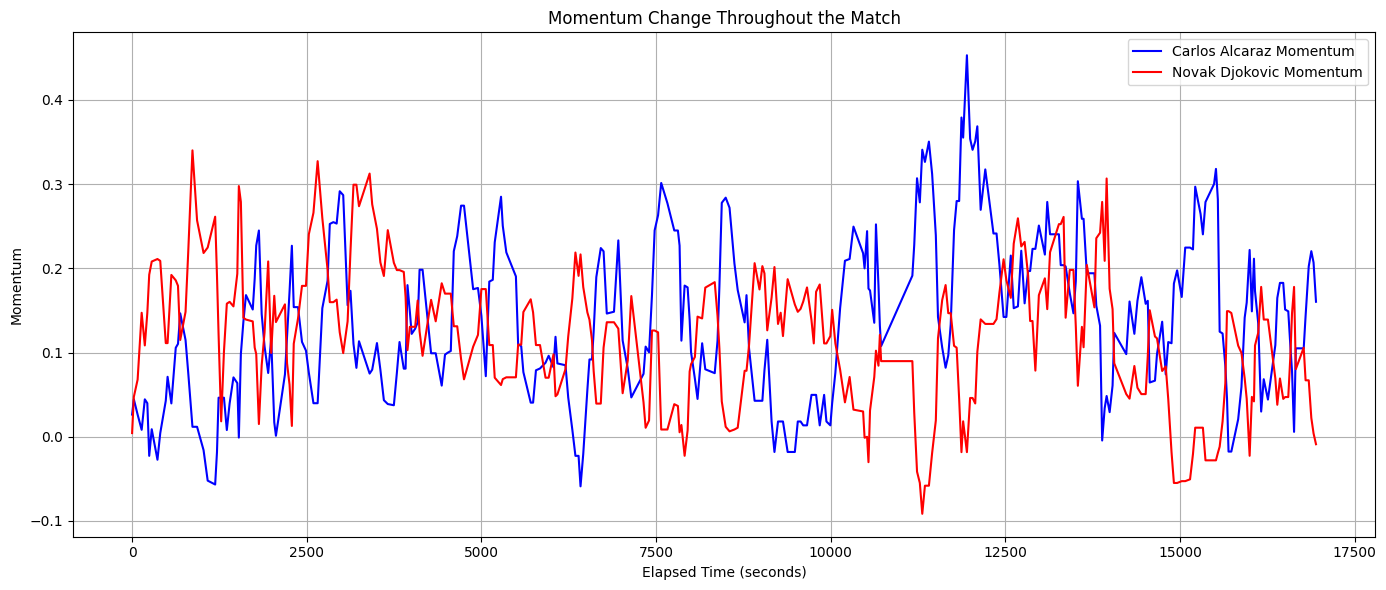

In [41]:
import matplotlib.pyplot as plt
import numpy as np

#将elapsed_time转换为秒
seconds = match_data['elapsed_time'].apply(lambda x: sum(int(a) * 60**index for index, a in enumerate(reversed(x.split(":")))))

#绘制势头变化图
plt.figure(figsize=(14, 6))

#Player1的势头变化
plt.plot(seconds, match_data['p1_momentum'], label=match_data['player1'].iloc[0] + " Momentum", color='blue')
#Player2的势头变化
plt.plot(seconds, match_data['p2_momentum'], label=match_data['player2'].iloc[0] + " Momentum", color='red')

#标题和坐标轴
plt.legend()
plt.title('Momentum Change Throughout the Match')
plt.xlabel('Elapsed Time (seconds)')
plt.ylabel('Momentum')
plt.grid(True)
plt.tight_layout()

# 显示图表
plt.show()

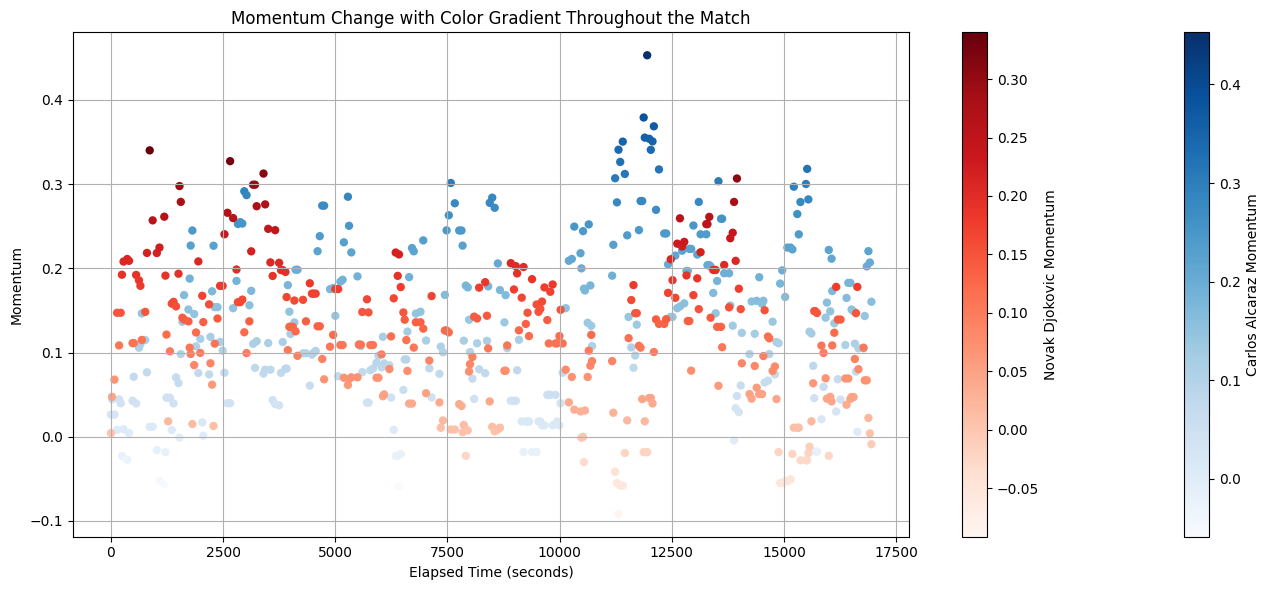

In [42]:
#球员在不同时间点的势头优势程度，可以用颜色的深浅代表
#颜色越深 势头越大 反之亦然

# 创建颜色映射
# 势头的范围
momentum_range = np.linspace(min(min(match_data['p1_momentum']), min(match_data['p2_momentum'])),
                             max(max(match_data['p1_momentum']), max(match_data['p2_momentum'])), num=100)
# 创建一个颜色映射对象
cmap = plt.get_cmap('coolwarm')

plt.figure(figsize=(14, 6))

# Player1的势头变化
sc1 = plt.scatter(seconds, match_data['p1_momentum'], c=match_data['p1_momentum'], cmap='Blues', label=match_data['player1'].iloc[0] + " Momentum", edgecolor='none')
# Player2的势头变化
sc2 = plt.scatter(seconds, match_data['p2_momentum'], c=match_data['p2_momentum'], cmap='Reds', label=match_data['player2'].iloc[0] + " Momentum", edgecolor='none')

#颜色条
cbar1 = plt.colorbar(sc1, orientation='vertical')
cbar2 = plt.colorbar(sc2, orientation='vertical')
cbar1.set_label(match_data['player1'].iloc[0] + ' Momentum')
cbar2.set_label(match_data['player2'].iloc[0] + ' Momentum')

#标题和坐标轴
plt.title('Momentum Change with Color Gradient Throughout the Match')
plt.xlabel('Elapsed Time (seconds)')
plt.ylabel('Momentum')

plt.grid(True)
plt.tight_layout()
plt.show()

In [43]:
#以上，完成散点图，将球员势头在何时呈现优势或劣势可视化展示出来

In [44]:
#运用cusum检测转折点

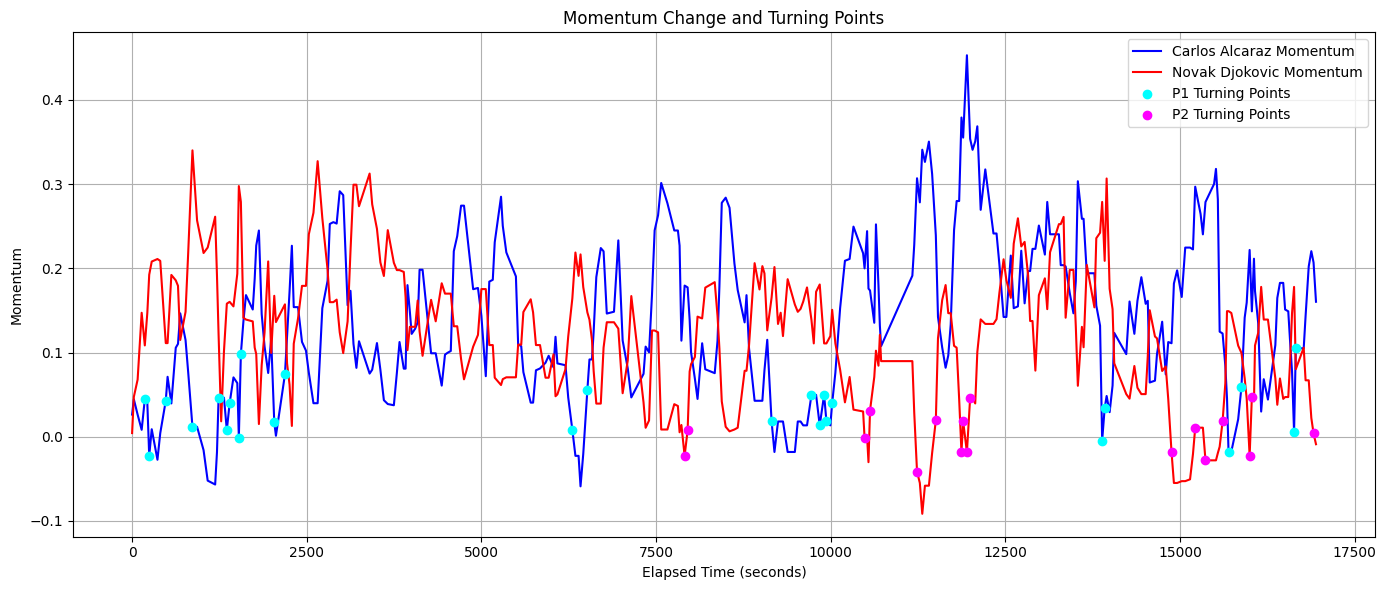

In [47]:
#势头的转折点
def cusum_detection(series):
    # 运用差分序列
    diff_series = series.diff().fillna(0)  #用0填充NaN值
    #累积和
    cusum_series = diff_series.cumsum()
    
    # 识别转折点：当累积和重新穿过零点时，认为是转折点
    turning_points = []
    for i in range(1, len(cusum_series)):
        #如果累积和符号与前一个不同，认为是转折点
        if cusum_series[i] * cusum_series[i-1] < 0:
            turning_points.append(i)
    
    return turning_points

# CUSUM检测算法 识别转折点
p1_turning_points = cusum_detection(match_data['p1_momentum'])
p2_turning_points = cusum_detection(match_data['p2_momentum'])

#Player1和2的势头变化
plt.figure(figsize=(14, 6))
plt.plot(seconds, match_data['p1_momentum'], label=match_data['player1'].iloc[0] + " Momentum", color='blue')
plt.plot(seconds, match_data['p2_momentum'], label=match_data['player2'].iloc[0] + " Momentum", color='red')

#转折点进行标记
plt.scatter(seconds.iloc[p1_turning_points], match_data['p1_momentum'].iloc[p1_turning_points], color='cyan', label='P1 Turning Points', zorder=5)
plt.scatter(seconds.iloc[p2_turning_points], match_data['p2_momentum'].iloc[p2_turning_points], color='magenta', label='P2 Turning Points', zorder=5)

plt.legend()
plt.title('Momentum Change and Turning Points')
plt.xlabel('Elapsed Time (seconds)')
plt.ylabel('Momentum')
plt.grid(True)
plt.tight_layout()
plt.show()

In [48]:
#另一种：ruptures，绘制出变化点，能够加入惩罚项

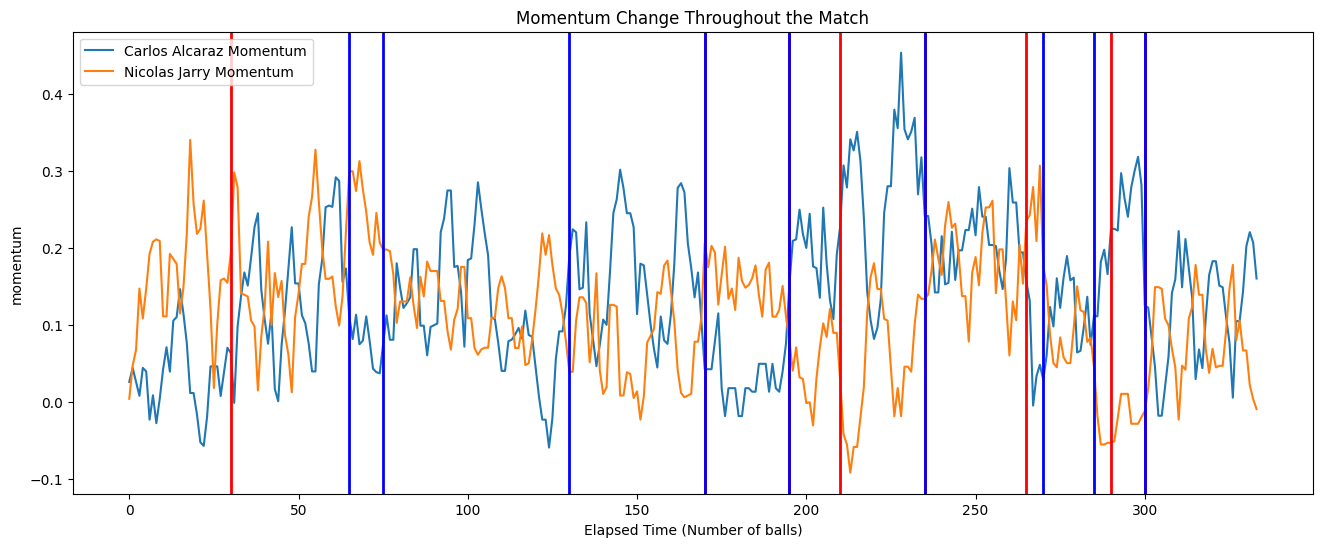

In [53]:
# 计算ts的变化点  
ts_change = match_data['p1_momentum'].diff().where(match_data['p1_momentum'].diff() > 0.1, 0).cumsum().tolist()
  
# 计算ss的变化点  
ss_change = match_data['p2_momentum'].diff().where(match_data['p2_momentum'].diff() > 0.1, 0).cumsum().tolist()
import ruptures as rpt
# 绘图  
def plot_change_points_ruptures(df, ts, ss, ts_change, ss_change, title):  
    plt.figure(figsize=(16,6))  
    plt.plot(df.index, ts , ss)
    for x in ts_change:  
        plt.axvline(x, lw=2, color='red')  #垂直线代表转折
    for y in ss_change:  
        plt.axvline(y, lw=2, color='blue')  
    plt.title(title)  
    plt.xlabel('Elapsed Time (Number of balls)')  
    plt.ylabel('momentum')
    plt.legend(['Carlos Alcaraz Momentum','Nicolas Jarry Momentum'])
    plt.savefig('ruptures.png')
    plt.show()  

tsd = np.array(match_data['p1_momentum'])
ss = np.array(match_data['p2_momentum'])
detector1 = rpt.Pelt(model="rbf").fit(tsd)
detector2 = rpt.Pelt(model="rbf").fit(ss)
change_points1 = detector1.predict(pen=3) #penalty 
change_points2 = detector2.predict(pen=3) #penalty 
plot_change_points_ruptures(match_data, tsd, ss, change_points1[:-1], change_points2[:-1], 'Momentum Change Throughout the Match')

#版权声明：本文为博主原创文章，遵循 CC 4.0 BY-SA 版权协议，转载请附上原文出处链接和本声明。                      
#原文链接：https://blog.csdn.net/yyyyyyyyyyy_9/article/details/131844655

In [54]:
#球员势头的变化是不是随机的？
#运用游程检验进行判断

In [55]:
def mark_indices_in_list(length, indices):
    # 初始化列表，长度为length，所有值为0
    marked_list = [0] * length
    
    # 在指定索引位置标记为1
    for index in indices:
        if index < length:  # 确保索引在列表长度范围内
            marked_list[index] = 1
            
    return marked_list
list_length=len(match_data)
p1_turning_points = mark_indices_in_list(list_length, p1_turning_points)
p2_turning_points = mark_indices_in_list(list_length, p2_turning_points)

In [56]:
match_data['p1_turning_points']=p1_turning_points

match_data['p2_turning_points']=p2_turning_points
match_data[['match_id', 'player1', 'player2','p1_momentum', 'p2_momentum', 'p1_turning_points', 'p2_turning_points']].to_csv('Q2_demo.csv',index=None)

In [57]:
from scipy.stats import norm
def runs_test(sequence):
    # 将序列分为两类
    median_value = np.median(sequence)
    binary_sequence = [1 if x > median_value else 0 for x in sequence]
    
    # 计算游程数量
    runs = 1  # 至少有一个游程
    for i in range(1, len(binary_sequence)):
        if binary_sequence[i] != binary_sequence[i-1]:
            runs += 1
    
    # 计算期望的游程数量和标准差
    n1 = binary_sequence.count(1)
    n2 = binary_sequence.count(0)
    expected_runs = 2 * n1 * n2 / (n1 + n2) + 1
    variance = (expected_runs - 1) * (expected_runs - 2) / (n1 + n2 - 1)
    
    # 计算Z统计量
    Z = (runs - expected_runs) / np.sqrt(variance)
    # 计算p值
    p_value = 2 * (1 - norm.cdf(abs(Z)))  # 双尾检验
    return Z, p_value
runs_test( p1_momentum)

(-13.59037756324384, 0.0)

In [58]:
runs_test( p2_momentum)

(-11.28878136301706, 0.0)

In [59]:
runs_test( p1_turning_points)

(-3.2933182066077955, 0.0009901234770615108)

In [60]:
runs_test( p2_turning_points)

(-4.750543178148963, 2.0287096911264513e-06)

In [61]:
#能够拒绝原假设，非随机

In [ ]:
cccc=[]
def getva(x):
    if x<0.05:
        return 1
    else:
        return 0
for match_id in df['match_id'].unique():
#     match_id = "2023-wimbledon-1701"
    match_data = df[df['match_id'] == match_id].copy()
    match_data.reset_index(inplace=True,drop=True)
    # 对数据集中的每一行应用计算势头的函数
    momentum_values = [calculate_momentum_improved(match_data, index) for index in range(len(match_data))]
    p1_momentum=[]
    p2_momentum=[]
    for i in momentum_values:
        p1_momentum.append(i[0])
        p2_momentum.append(i[1])
    # 将计算得到的势头值分配回原始数据集
    match_data['p1_momentum']=pd.DataFrame(p1_momentum)
    match_data['p2_momentum']=pd.DataFrame(p2_momentum)
    p1_turning_points = cumsum_detection(match_data['p1_momentum'])
    p2_turning_points = cumsum_detection(match_data['p2_momentum'])
    list_length=len(match_data)
    p1_turning_points = mark_indices_in_list(list_length, p1_turning_points)
    p2_turning_points = mark_indices_in_list(list_length, p2_turning_points)

    Z_statistic, p_value1 = runs_test( p1_momentum)
    Z_statistic, p_value2 = runs_test( p2_momentum)
    Z_statistic, p_value3 = runs_test( p1_turning_points)
    Z_statistic, p_value4 = runs_test( p2_turning_points)
    cccc.append([match_id,getva(p_value1),getva(p_value2),getva(p_value3),getva(p_value4)])

In [ ]:
rrr=pd.DataFrame(cccc,columns=['match_id','p1_momentumisRand','p2_momentumisRand','p1_turning_pointsisRand','p2_turning_pointsisRand'])
rrr

In [ ]:
rrr.describe()
##确实非随机

In [ ]:
rrr.to_csv('Q2_test.csv',index=None)

In [ ]:
sss1 = match_data['p1_momentum']
sss1.to_csv("mom1.csv", index=False)

In [ ]:
sss2 = match_data['p2_momentum']
sss2.to_csv("mom2.csv", index=False)

In [ ]:
mom1 = pd.read_csv('mom1.csv')
mom2 = pd.read_csv('mom2.csv')
mom = pd.concat([mom1,mom2], axis=1, ignore_index=True)

In [ ]:
mom.columns=['p1_momentum', 'p2_momentum']
mom.to_csv("mom.csv", index=False)

In [ ]:
#灰色预测单独新建了一个文件进行预测

In [ ]:
#把决赛的数据挑出来作为研究对象。还可能影响比赛的部分有哪些？进行研究

In [ ]:
temp=dddd[(dddd['player1']=='Carlos Alcaraz')&(dddd['player2']=='Nicolas Jarry')]

In [ ]:
temp

In [ ]:
temp.isnull().sum()

In [ ]:
temp = temp.drop('return_depth',axis = 1) #丢掉缺失值太多的指标

In [ ]:
temp.reset_index(inplace=True,drop=True)

In [ ]:
temp.fillna(method='backfill',inplace=True)
temp.isnull().sum()

In [ ]:
temp['p1_score'].unique()

In [ ]:
temp['serve_width'].unique()

In [ ]:
temp['serve_depth'].unique()

In [ ]:
#可能会对结果造成影响的部分
temp1=pd.get_dummies(temp[['p1_score','p2_score','winner_shot_type','serve_width','serve_depth']],dtype=int)

In [ ]:
#不含上格内容的其他部分
temp2=temp[['set_no', 'game_no',
       'point_no', 'p1_sets', 'p2_sets', 'p1_games', 'p2_games','server', 'serve_no', 'point_victor', 'p1_points_won',
       'p2_points_won', 'game_victor', 'set_victor', 'p1_ace', 'p2_ace',
       'p1_winner', 'p2_winner', 'p1_double_fault',
       'p2_double_fault', 'p1_unf_err', 'p2_unf_err', 'p1_net_pt', 'p2_net_pt',
       'p1_net_pt_won', 'p2_net_pt_won', 'p1_break_pt', 'p2_break_pt',
       'p1_break_pt_won', 'p2_break_pt_won', 'p1_break_pt_missed',
       'p2_break_pt_missed', 'p1_distance_run', 'p2_distance_run',
       'rally_count', 'speed_mph', 'p1_momentum', 'p2_momentum']]

In [ ]:
data=pd.concat([temp1,temp2],axis=1)

In [ ]:
#对player1做研究 y是势头，做差分
data['p1_momentum_diff1']=data['p1_momentum'].diff(1)
#由于player1和2的势头度量的原理一样，并且用于度量势头的各个指标的权重也基本相同
#因此，对player1做研究，player2是同理的

In [ ]:
data=data.dropna()
data.reset_index(inplace=True,drop=True)

In [ ]:
import pandas as pd
import numpy as np
import xgboost as xgb
from sklearn.tree import DecisionTreeRegressor,DecisionTreeClassifier
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, GradientBoostingRegressor,RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier
from sklearn.metrics import accuracy_score, recall_score, f1_score, roc_curve, auc,precision_score

from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from math import sqrt
# 分离X和Y
X = data[['p1_score_0', 'p1_score_1', 'p1_score_15', 'p1_score_2', 'p1_score_3',
       'p1_score_30', 'p1_score_4', 'p1_score_40', 'p1_score_5', 'p1_score_6',
       'p1_score_AD', 'p2_score_0', 'p2_score_1', 'p2_score_15', 'p2_score_2',
       'p2_score_3', 'p2_score_30', 'p2_score_4', 'p2_score_40', 'p2_score_5',
       'p2_score_6', 'p2_score_7', 'p2_score_AD', 'winner_shot_type_0',
       'winner_shot_type_B', 'winner_shot_type_F', 'serve_width_B',
       'serve_width_BC', 'serve_width_BW', 'serve_width_C', 'serve_width_W',
       'serve_depth_CTL', 'serve_depth_NCTL', 'set_no', 'game_no', 'point_no',
       'p1_sets', 'p2_sets', 'p1_games', 'p2_games', 'server', 'serve_no',
       'point_victor', 'p1_points_won', 'p2_points_won', 'game_victor',
       'set_victor', 'p1_ace', 'p2_ace', 'p1_winner', 'p2_winner',
       'p1_double_fault', 'p2_double_fault', 'p1_unf_err', 'p2_unf_err',
       'p1_net_pt', 'p2_net_pt', 'p1_net_pt_won', 'p2_net_pt_won',
       'p1_break_pt', 'p2_break_pt', 'p1_break_pt_won', 'p2_break_pt_won',
       'p1_break_pt_missed', 'p2_break_pt_missed', 'p1_distance_run',
       'p2_distance_run', 'rally_count', 'speed_mph']]

Y = data['p1_momentum_diff1']

In [ ]:
#机器学习模型前期准备
from numpy import *
from sklearn.neural_network import MLPRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor,GradientBoostingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import learning_curve
import xgboost as xgb
from sklearn.metrics import accuracy_score,recall_score,f1_score
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, r2_score
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import train_test_split

def mape(actual, pred): 
    actual, pred = np.array(actual), np.array(pred)
    return np.mean(np.abs((actual - pred) / actual))

In [ ]:
tr_x,te_x,tr_y,te_y=train_test_split(X ,Y,test_size=0.3,random_state=5)
#拆分一下训练集和测试集

In [ ]:
#探索研究，哪种模型用于预测势头更好
#线性回归模型
print("\n线性回归:")
logreg = LinearRegression()
logreg.fit(tr_x1, tr_y1)
y_pred = logreg.predict(te_x1)
print("训练集平均绝对百分比误差:{:.3f}".format(mape(logreg.predict(tr_x1),tr_y1)))
print("测试集平均绝对百分比误差:{:.3f}".format(mape(logreg.predict(te_x1),te_y1)))
print("平均绝对误差:",mean_absolute_error(te_y1, y_pred))
print("r2_score",r2_score(te_y1,y_pred))

In [ ]:
plt.figure(figsize=(10, 6))

#训练集
tr_y_pred = logreg.predict(tr_x1)
plt.scatter(list(range(tr_y1.shape[0])), tr_y1, color='royalblue', label='Training set true value', alpha=0.35)
plt.scatter(list(range(tr_y1.shape[0])), tr_y_pred, color='mediumseagreen', label='Training set predict value', alpha=0.35)
#测试集
te_y_pred = logreg.predict(te_x1)
plt.scatter(list(range(te_y1.shape[0])), te_y1, color='lightcoral', label='Test set true value', alpha=0.35)
plt.scatter(list(range(te_y1.shape[0])), te_y_pred, color='darkorange', label='Test set predict value', alpha=0.35)

#图
plt.title('true vs. predict')
plt.xlabel('SampleNumber')
plt.ylabel('PotentialEnergy')
plt.legend()
plt.show()

In [ ]:
#神经网络模型
model=MLPRegressor(hidden_layer_sizes=10,max_iter=1000).fit(tr_x1,tr_y1)
y_pred=model.predict(te_x1)

print("神经网络:")
print("训练集平均绝对百分比误差:{:.3f}".format(mape(model.predict(tr_x1),tr_y1)))
print("测试集平均绝对百分比误差:{:.3f}".format(mape(model.predict(te_x1),te_y1)))
print("平均绝对误差:",mean_absolute_error(te_y1, y_pred))
print("r2_score",r2_score(te_y1,y_pred))

In [ ]:
plt.figure(figsize=(10, 6))

#训练集
tr_y_pred = model.predict(tr_x1)
plt.scatter(list(range(tr_y1.shape[0])), tr_y1, color='royalblue', label='Training set true value', alpha=0.35)
plt.scatter(list(range(tr_y1.shape[0])), tr_y_pred, color='mediumseagreen', label='Training set predict value', alpha=0.35)
#测试集
te_y_pred = model.predict(te_x1)
plt.scatter(list(range(te_y1.shape[0])), te_y1, color='lightcoral', label='Test set true value', alpha=0.35)
plt.scatter(list(range(te_y1.shape[0])), te_y_pred, color='darkorange', label='Test set predict value', alpha=0.35)

#图
plt.title('true vs. predict')
plt.xlabel('SampleNumber')
plt.ylabel('PotentialEnergy')
plt.legend()
plt.show()

In [ ]:
#决策树模型
print("\n决策树回归:")
tree=DecisionTreeRegressor(max_depth=50,random_state=30)
tree.fit(tr_x1,tr_y1)
y_pred = tree.predict(te_x1)
print("训练集平均绝对百分比误差:{:.3f}".format(mape(tree.predict(tr_x1),tr_y1)))
print("测试集平均绝对百分比误差:{:.3f}".format(mape(tree.predict(te_x1),te_y1)))
print("平均绝对误差:",mean_absolute_error(te_y1, y_pred))
print("r2_score",r2_score(te_y1,y_pred))

In [ ]:
plt.figure(figsize=(10, 6))

#训练集
tr_y_pred = tree.predict(tr_x1)
plt.scatter(list(range(tr_y1.shape[0])), tr_y1, color='royalblue', label='Training set true value', alpha=0.35)
plt.scatter(list(range(tr_y1.shape[0])), tr_y_pred, color='mediumseagreen', label='Training set predict value', alpha=0.35)
#测试集
te_y_pred = tree.predict(te_x1)
plt.scatter(list(range(te_y1.shape[0])), te_y1, color='lightcoral', label='Test set true value', alpha=0.35)
plt.scatter(list(range(te_y1.shape[0])), te_y_pred, color='darkorange', label='Test set predict value', alpha=0.35)

#图
plt.title('true vs. predict')
plt.xlabel('SampleNumber')
plt.ylabel('PotentialEnergy')
plt.legend()
plt.show()

In [ ]:
#随机森林模型
print("\n随机森林回归:")
rf=RandomForestRegressor()
rf.fit(tr_x1,tr_y1)
y_pred = rf.predict(te_x1)
print("训练集平均绝对百分比误差:{:.3f}".format(mape(rf.predict(tr_x1),tr_y1)))
print("测试集平均绝对百分比误差:{:.3f}".format(mape(rf.predict(te_x1),te_y1)))
print("平均绝对误差:",mean_absolute_error(te_y1, y_pred))
print("r2_score",r2_score(te_y1,y_pred))

In [ ]:
plt.figure(figsize=(10, 6))

#训练集
tr_y_pred = rf.predict(tr_x1)
plt.scatter(list(range(tr_y1.shape[0])), tr_y1, color='royalblue', label='Training set true value', alpha=0.35)
plt.scatter(list(range(tr_y1.shape[0])), tr_y_pred, color='mediumseagreen', label='Training set predict value', alpha=0.35)
#测试集
te_y_pred = rf.predict(te_x1)
plt.scatter(list(range(te_y1.shape[0])), te_y1, color='lightcoral', label='Test set true value', alpha=0.35)
plt.scatter(list(range(te_y1.shape[0])), te_y_pred, color='darkorange', label='Test set predict value', alpha=0.35)

#图
plt.title('true vs. predict')
plt.xlabel('SampleNumber')
plt.ylabel('PotentialEnergy')
plt.legend()
plt.show()

In [ ]:
#Adaboost回归模型
print("\nAdaboost回归:")
# 构建Adaboost回归模型
ada_model = AdaBoostRegressor(n_estimators=100)
ada_model.fit(tr_x1,tr_y1)
y_pred = ada_model.predict(te_x1)
print("训练集平均绝对百分比误差:{:.3f}".format(mape(ada_model.predict(tr_x1),tr_y1)))
print("测试集平均绝对百分比误差:{:.3f}".format(mape(ada_model.predict(te_x1),te_y1)))
print("平均绝对误差:",mean_absolute_error(te_y1, y_pred))
print("r2_score",r2_score(te_y1,y_pred))

In [ ]:
plt.figure(figsize=(10, 6))

#训练集
tr_y_pred = ada_model.predict(tr_x1)
plt.scatter(list(range(tr_y1.shape[0])), tr_y1, color='royalblue', label='Training set true value', alpha=0.35)
plt.scatter(list(range(tr_y1.shape[0])), tr_y_pred, color='mediumseagreen', label='Training set predict value', alpha=0.35)
#测试集
te_y_pred = ada_model.predict(te_x1)
plt.scatter(list(range(te_y1.shape[0])), te_y1, color='lightcoral', label='Test set true value', alpha=0.35)
plt.scatter(list(range(te_y1.shape[0])), te_y_pred, color='darkorange', label='Test set predict value', alpha=0.35)

#图
plt.title('true vs. predict')
plt.xlabel('SampleNumber')
plt.ylabel('PotentialEnergy')
plt.legend()
plt.show()

In [ ]:
#GBDT回归模型
print("\nGBDT回归:")
# 构建GBDT回归模型
gbdt_model = GradientBoostingRegressor(n_estimators=100, max_depth=3, learning_rate=0.1, random_state=42)
gbdt_model.fit(tr_x1, tr_y1)
y_pred = gbdt_model.predict(te_x1)
print("训练集平均绝对百分比误差:{:.3f}".format(mape(gbdt_model.predict(tr_x1),tr_y1)))
print("测试集平均绝对百分比误差:{:.3f}".format(mape(gbdt_model.predict(te_x1),te_y1)))
print("平均绝对误差:",mean_absolute_error(te_y1, y_pred))
print("r2_score",r2_score(te_y1,y_pred))

In [ ]:
plt.figure(figsize=(10, 6))

#训练集
tr_y_pred = gbdt_model.predict(tr_x1)
plt.scatter(list(range(tr_y1.shape[0])), tr_y1, color='royalblue', label='Training set true value', alpha=0.35)
plt.scatter(list(range(tr_y1.shape[0])), tr_y_pred, color='mediumseagreen', label='Training set predict value', alpha=0.35)
#测试集
te_y_pred = gbdt_model.predict(te_x1)
plt.scatter(list(range(te_y1.shape[0])), te_y1, color='lightcoral', label='Test set true value', alpha=0.35)
plt.scatter(list(range(te_y1.shape[0])), te_y_pred, color='darkorange', label='Test set predict value', alpha=0.35)

#图
plt.title('true vs. predict')
plt.xlabel('SampleNumber')
plt.ylabel('PotentialEnergy')
plt.legend()
plt.show()

In [ ]:
#xgb回归模型
print("\nxgboost回归:")
# 构建xgboost回归模型
xgb_model = xgb.XGBRegressor()
xgb_model.fit(tr_x1, tr_y1)

y_pred = xgb_model.predict(te_x1)
print("训练集平均绝对百分比误差:{:.3f}".format(mape(xgb_model.predict(tr_x1),tr_y1)))
print("测试集平均绝对百分比误差:{:.3f}".format(mape(xgb_model.predict(te_x1),te_y1)))
print("平均绝对误差:",mean_absolute_error(te_y1, y_pred))
print("r2_score",r2_score(te_y1,y_pred))

In [ ]:
plt.figure(figsize=(10, 6))

#训练集
tr_y_pred = xgb_model.predict(tr_x1)
plt.scatter(list(range(tr_y1.shape[0])), tr_y1, color='royalblue', label='Training set true value', alpha=0.35)
plt.scatter(list(range(tr_y1.shape[0])), tr_y_pred, color='mediumseagreen', label='Training set predict value', alpha=0.35)
#测试集
te_y_pred = xgb_model.predict(te_x1)
plt.scatter(list(range(te_y1.shape[0])), te_y1, color='lightcoral', label='Test set true value', alpha=0.35)
plt.scatter(list(range(te_y1.shape[0])), te_y_pred, color='darkorange', label='Test set predict value', alpha=0.35)

#图
plt.title('true vs. predict')
plt.xlabel('SampleNumber')
plt.ylabel('PotentialEnergy')
plt.legend()
plt.show()

In [ ]:
#根据各种模型的结果，最终选择效果最好的GBDT模型

In [ ]:
#建立dev_data，是各种指标的分类全部拆开后的数据集
dev_list = ['2023-wimbledon-1701','2023-wimbledon-1601','2023-wimbledon-1501','2023-wimbledon-1503',
            '2023-wimbledon-1401','2023-wimbledon-1403','2023-wimbledon-1405','2023-wimbledon-1407',
            '2023-wimbledon-1301','2023-wimbledon-1303','2023-wimbledon-1305','2023-wimbledon-1307',
            '2023-wimbledon-1309','2023-wimbledon-1311','2023-wimbledon-1313','2023-wimbledon-1315']
dev_data = pd.DataFrame()
for n in dev_list:
    dev_data = pd.concat([dev_data, data[data['match_id'] == n].copy()],axis=0)

In [ ]:
del dev_data['match_id']
del dev_data['p1_momentum']
del dev_data['p2_momentum']

In [ ]:
dev_data.to_csv('dev_data.csv',index=False)

In [ ]:
#建立test_data，是每轮比赛的其中一场
test_list = ['2023-wimbledon-1602','2023-wimbledon-1504','2023-wimbledon-1406','2023-wimbledon-1308','2023-wimbledon-1310']
test_data = pd.DataFrame()
for n in test_list:
    test_data = pd.concat([test_data, data[data['match_id'] == n].copy()],axis=0)

In [ ]:
test_data.to_csv('test_data.csv',index=False)

In [ ]:
#用dev_data重新训练GBDT回归模型
#dev_data是各种指标的分类全部拆开后的数据集
print("\nGBDT回归:")
gbdt_model_1 = GradientBoostingRegressor(n_estimators=100, max_depth=3, learning_rate=0.1, random_state=42)
gbdt_model_1.fit(X, Y1)
y_pred = gbdt_model_1.predict(X)
print("平均绝对误差:",mean_absolute_error(Y1, y_pred))
print("r2_score",r2_score(Y1,y_pred))

In [ ]:
plt.figure(figsize=(10, 6))

#训练集
tr_y_pred = gbdt_model_1.predict(X)
plt.scatter(list(range(X.shape[0])), Y1, color='royalblue', label='true', alpha=0.5)
plt.scatter(list(range(X.shape[0])), tr_y_pred, color='mediumseagreen', label='predict', alpha=0.5)

#图
plt.title('true vs. predict')
plt.xlabel('SampleNumber')
plt.ylabel('PotentialEnergy')
plt.legend()
plt.show()

In [ ]:
#用SHAP分析经过训练的GBDT模型中，各指标的贡献程度和重要性

In [ ]:
import shap
import matplotlib.pyplot as plt
plt.rcParams["font.sans-serif"]=["SimHei"]
plt.rcParams["axes.unicode_minus"]=False

explainer = shap.Explainer(xgb_model)

shap.initjs()
shap_values = explainer.shap_values(X) #算SHAP值

In [ ]:
shap_df = pd.DataFrame(shap_values.values, columns=X.columns)

# 输出每个特征的SHAP值（绝对值）
features=[]
abs_mean_shap_values=[]
for i, feature in enumerate(X.columns):
    abs_mean_shap_value = np.abs(shap_df.values[:, i]).mean()
    features.append(feature)
    abs_mean_shap_values.append(abs_mean_shap_value)

In [ ]:
tt=pd.DataFrame(features,columns=['features'])
tt['shap_values']=abs_mean_shap_values

In [ ]:
tt1=pd.read_csv('tt.csv')
tt1

In [ ]:
tt['classify']=tt1['classify']

In [ ]:
a = tt.groupby('classify').sum()
del a['features']
a
#得到不同指标下的shap值

In [ ]:
a.to_csv('features_shap_value.csv',index=False)

In [ ]:
#避免乱码问题
plt.rcParams['font.sans-serif'] = ['SimHei']  
plt.rcParams['axes.unicode_minus'] = False    
sns.set(font='SimHei')                        
a_sorted = a.sort_values(by='shap_values', ascending=False)

In [ ]:
#依据shap值对不同指标的重要程度进行排序
plt.figure(figsize=(10, 6))

sns.barplot(x='shap_values', y='classify', data=a_sorted.reset_index(), orient='h')
plt.savefig('classify')
plt.show()

In [ ]:
shap.plots.beeswarm(explainer(X),max_display=20)

In [ ]:
shap.plots.bar(explainer(X),max_display=20)

In [ ]:
#用GBDT模型对test_data进行预测，并通过指标判断模型的预测能力

In [ ]:
# 分离X和Y
t_X = test_data[['p1_score_0', 'p1_score_1', 'p1_score_15', 'p1_score_2', 'p1_score_3',
       'p1_score_30', 'p1_score_4', 'p1_score_40', 'p1_score_5', 'p1_score_6',
       'p1_score_7', 'p1_score_8', 'p1_score_9', 'p1_score_AD', 'p2_score_0',
       'p2_score_1', 'p2_score_10', 'p2_score_15', 'p2_score_2', 'p2_score_3',
       'p2_score_30', 'p2_score_4', 'p2_score_40', 'p2_score_5', 'p2_score_6',
       'p2_score_7', 'p2_score_8', 'p2_score_9', 'p2_score_AD',
       'winner_shot_type_0', 'winner_shot_type_B', 'winner_shot_type_F',
       'serve_width_B', 'serve_width_BC', 'serve_width_BW', 'serve_width_C',
       'serve_width_W', 'serve_depth_CTL', 'serve_depth_NCTL', 'set_no',
       'game_no', 'point_no', 'p1_sets', 'p2_sets', 'p1_games', 'p2_games',
       'server', 'serve_no', 'point_victor', 'p1_points_won', 'p2_points_won',
       'game_victor', 'set_victor', 'p1_ace', 'p2_ace', 'p1_winner',
       'p2_winner', 'p1_double_fault', 'p2_double_fault', 'p1_unf_err',
       'p2_unf_err', 'p1_net_pt', 'p2_net_pt', 'p1_net_pt_won',
       'p2_net_pt_won', 'p1_break_pt', 'p2_break_pt', 'p1_break_pt_won',
       'p2_break_pt_won', 'p1_break_pt_missed', 'p2_break_pt_missed',
       'p1_distance_run', 'p2_distance_run', 'rally_count', 'speed_mph',
       'p1_ovw_s', 'p2_ovw_s']]


t_Y1 = test_data['p1_momentum_diff']
t_Y2 = test_data['p2_momentum_diff']

In [ ]:
#重新训练、用GBDT模型
print("\nGBDT预测效果:")
y_pred = gbdt_model_1.predict(t_X)
print("平均绝对误差:",mean_absolute_error(t_Y1, y_pred))
print("r2_score",r2_score(t_Y1,y_pred))

In [ ]:
plt.figure(figsize=(10, 6))

#测试集
t_y_pred = gbdt_model_1.predict(t_X)
plt.scatter(list(range(t_X.shape[0])), t_Y1, color='royalblue', label='true', alpha=0.5)
plt.scatter(list(range(t_X.shape[0])), t_y_pred, color='mediumseagreen', label='predict', alpha=0.5)

#图
plt.title('true vs. predict')
plt.xlabel('SampleNumber')
plt.ylabel('PotentialEnergy')
plt.legend()
plt.show()

In [ ]:
test = test_data.copy()
test['predict'] = t_y_pred
test = test[['match_id','p1_momentum','p1_momentum_diff','predict']]

In [ ]:
#把需要的指标摘出来
m0 = df[['match_id','player1','elapsed_time','p1_momentum']]
m = pd.DataFrame()
for n in test_list:
    m  = pd.concat([m,m0[m0['match_id']==n]],axis=0)

In [ ]:
testing = pd.merge(m,test,on=['match_id','p1_momentum'],how='left')

In [ ]:
testing.to_csv('testing.csv',index=False)

In [ ]:
#随意选取了一场比赛来对势头转变进行描绘
df_r = testing[testing['match_id']=='2023-wimbledon-1310']
elapsed_seconds = df_r['elapsed_time'].apply(lambda x: sum(int(a) * 60**index for index, a in enumerate(reversed(x.split(":")))))
df_r.reset_index(inplace=True,drop=True)

#CUSUM检测算法来识别球员势头的转折点
p1_turning_points = cumsum_detection(df_r['p1_momentum'])
pred_turning_points = cumsum_detection(df_r['predict'])

#势头变化和转折点
plt.figure(figsize=(14, 6))
plt.plot(elapsed_seconds, df_r['p1_momentum'], label=df_r['player1'].iloc[0] + " Momentum", color='royalblue')

plt.scatter(elapsed_seconds.iloc[p1_turning_points], df_r['p1_momentum'].iloc[p1_turning_points], color='darkviolet', label='P1 Turning Points', zorder=5)
plt.scatter(elapsed_seconds.iloc[pred_turning_points], df_r['p1_momentum'].iloc[pred_turning_points], color='darkorange', label='Predictive Turning Points', zorder=5)

plt.legend()
plt.title('Momentum Change and Turning Points')
plt.xlabel('Elapsed Time (seconds)')
plt.ylabel('P1 Momentum')
plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
#随意再选一场比赛
df_r = testing[testing['match_id']=='2023-wimbledon-1504']
elapsed_seconds = df_r['elapsed_time'].apply(lambda x: sum(int(a) * 60**index for index, a in enumerate(reversed(x.split(":")))))
df_r.reset_index(inplace=True,drop=True)

p1_turning_points = cumsum_detection(df_r['p1_momentum'])
pred_turning_points = cumsum_detection(df_r['predict'])

plt.figure(figsize=(14, 6))
plt.plot(elapsed_seconds, df_r['p1_momentum'], label=df_r['player1'].iloc[0] + " Momentum", color='royalblue')

plt.scatter(elapsed_seconds.iloc[p1_turning_points], df_r['p1_momentum'].iloc[p1_turning_points], color='darkviolet', label='P1 Turning Points', zorder=5)
plt.scatter(elapsed_seconds.iloc[pred_turning_points], df_r['p1_momentum'].iloc[pred_turning_points], color='darkorange', label='Predictive Turning Points', zorder=5)

plt.legend()
plt.title('Momentum Change and Turning Points')
plt.xlabel('Elapsed Time (seconds)')
plt.ylabel('P1 Momentum')
plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
#可见模型整体效果不错 可以用于确定比赛中球员的势头波动。